# **Adidas Sales Analysis**

## 🗂️ Project Overview
The Adidas Sales Analysis project leverages robust data visualization and collaborative analysis tools to optimize sales strategies and enhance overall performance. This project identifies key sales drivers, geographic performance trends, and product-specific insights, enabling the Adidas team to make informed decisions about pricing, inventory, and marketing.

## 🎯 Objectives

1. **Enhanced Understanding of Sales Dynamics**: Analyze sales trends and identify key performance drivers across various regions, products, and sales methods.
2. **Geographic Sales Potential:** Detect regions with high and low sales potential to enable strategic regional focus and resource allocation.
3. **Product Performance Insights:** Evaluate product-specific performance metrics to inform inventory management and marketing strategies.
4. **Informed Pricing and Margin Strategies:** Develop data-backed pricing strategies and optimize operating margins for improved profitability.
5. **Actionable Recommendations:** Provide clear, data-driven recommendations to optimize sales and profitability across multiple business dimensions.

## 📊 Data Description
Metrics
- Total Sales: Total revenue generated from product sales.
- Operating Profit: Profit calculated as the difference between Total Sales and operating expenses.
- Units Sold: Total number of product units sold.
- Price per Unit: Selling price of each product unit.
- Operating Margin: The ratio of Operating Profit to Total Sales, indicating profitability.

Dimensions
- Retailer: Name of the retailer responsible for the transaction.
- Product: Name and category of the product sold (e.g., Men's Footwear, Women's Apparel).
- Region: Geographic region of the transaction (e.g., Northeast, Midwest).
- State: U.S. state where the transaction occurred.
- City: City where the transaction took place.
- Invoice Date: Date of the sales transaction.
- Sales Method: Sales channel used (e.g., In-store, Online).

This breakdown of metrics and dimensions provides a structured approach for analyzing sales trends and profitability while supporting strategic business decisions.

# 🌟Business Insight Overview

# Recommendations & Next Steps

# Data Wrangling

In [7]:
from google.colab import drive
drive.mount('/content/drive')

!ls "/content/drive/My Drive"

Mounted at /content/drive
'Bangkit 2024'			  'Colab Notebooks'		    'Learn Finance Track'
 BI				   data				    'Machine Learning'
'Business Analytics Himabis.pdf'  'Dicoding for financial analyst'   Prototype
 Classroom			   Document			     Sopyan_KRS.pdf


In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import missingno as msno
from textwrap import wrap

In [8]:
file_path = "/content/drive/MyDrive/Document/Analysis Data/Dataset/project3/Adidas US Sales Datasets.xlsx"
df = pd.read_excel(file_path)
df.shape

(9648, 13)

In [ ]:
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store


# Assesing the Data

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   int64         
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Product           9648 non-null   object        
 7   Price per Unit    9648 non-null   float64       
 8   Units Sold        9648 non-null   int64         
 9   Total Sales       9648 non-null   float64       
 10  Operating Profit  9648 non-null   float64       
 11  Operating Margin  9648 non-null   float64       
 12  Sales Method      9648 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 980.0+ KB


In [10]:
pd.isnull(df).sum()

,0
Retailer,0
Retailer ID,0
Invoice Date,0
Region,0
State,0
City,0
Product,0
Price per Unit,0
Units Sold,0
Total Sales,0


In [11]:
df.describe()

,Retailer ID,Invoice Date,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin
count,9.648000e+03,9648,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000
mean,1.173850e+06,2021-05-10 15:20:44.776119296,45.216625,256.930037,93273.437500,34425.244761,0.422991
min,1.128299e+06,2020-01-01 00:00:00,7.000000,0.000000,0.000000,0.000000,0.100000
25%,1.185732e+06,2021-02-17 00:00:00,35.000000,106.000000,4254.500000,1921.752500,0.350000
50%,1.185732e+06,2021-06-04 00:00:00,45.000000,176.000000,9576.000000,4371.420000,0.410000
75%,1.185732e+06,2021-09-16 00:00:00,55.000000,350.000000,150000.000000,52062.500000,0.490000
max,1.197831e+06,2021-12-31 00:00:00,110.000000,1275.000000,825000.000000,390000.000000,0.800000
std,2.636038e+04,NaN,14.705397,214.252030,141916.016727,54193.113713,0.097197


# Exploratory Data Analysis

In [14]:
# Analyze sales trends by region
region_sales = df.groupby('Region')['Total Sales'].sum().sort_values(ascending=False)
print(region_sales)

Region
West         269943182.0
Northeast    186324067.0
Southeast    163171236.0
South        144663181.0
Midwest      135800459.0
Name: Total Sales, dtype: float64


In [22]:
# Analyze sales trends by product category
product_sales = df.groupby('Product')['Total Sales'].sum().sort_values(ascending=False)
print("\nTotal Sales by Product Category:")
print(product_sales)



Total Sales by Product Category:
Product
Men's Street Footwear        208826244.0
Women's Apparel              179038860.0
Men's Athletic Footwear      153673680.0
Women's Street Footwear      128002813.0
Men's Apparel                123728632.0
Women's Athletic Footwear    106631896.0
Name: Total Sales, dtype: float64


In [24]:
# Analyze sales trends by sales method
method_sales = df.groupby('Sales Method')['Total Sales'].sum().sort_values(ascending=False)


In [26]:
# Identify key performance drivers (correlation analysis)
print("\nCorrelation Analysis:")
correlation_matrix = df[['Total Sales', 'Operating Profit', 'Units Sold', 'Price per Unit', 'Operating Margin']].corr()
print(correlation_matrix)



Correlation Analysis:
                  Total Sales  Operating Profit  Units Sold  Price per Unit  \
Total Sales          1.000000          0.956307    0.913431        0.435811   
Operating Profit     0.956307          1.000000    0.892379        0.394546   
Units Sold           0.913431          0.892379    1.000000        0.265869   
Price per Unit       0.435811          0.394546    0.265869        1.000000   
Operating Margin    -0.364592         -0.211920   -0.305479       -0.137486   

                  Operating Margin  
Total Sales              -0.364592  
Operating Profit         -0.211920  
Units Sold               -0.305479  
Price per Unit           -0.137486  
Operating Margin          1.000000  


# Visualization & Explanatory Analysis

<ipython-input-19-18b251220087>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_sales.index, y=region_sales.values, palette="viridis")


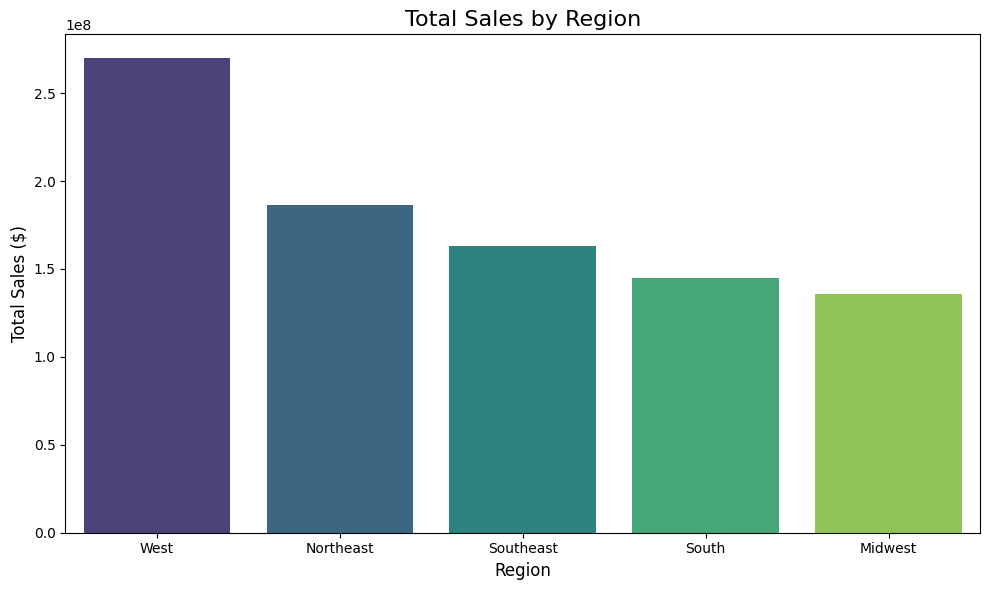

In [19]:
# Visualize sales trends by region
plt.figure(figsize=(10, 6))
sns.barplot(x=region_sales.index, y=region_sales.values, palette="viridis")
plt.title("Total Sales by Region", fontsize=16)
plt.ylabel("Total Sales ($)", fontsize=12)
plt.xlabel("Region", fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

<ipython-input-23-9a06e7466113>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_sales.index, y=product_sales.values, palette="magma")


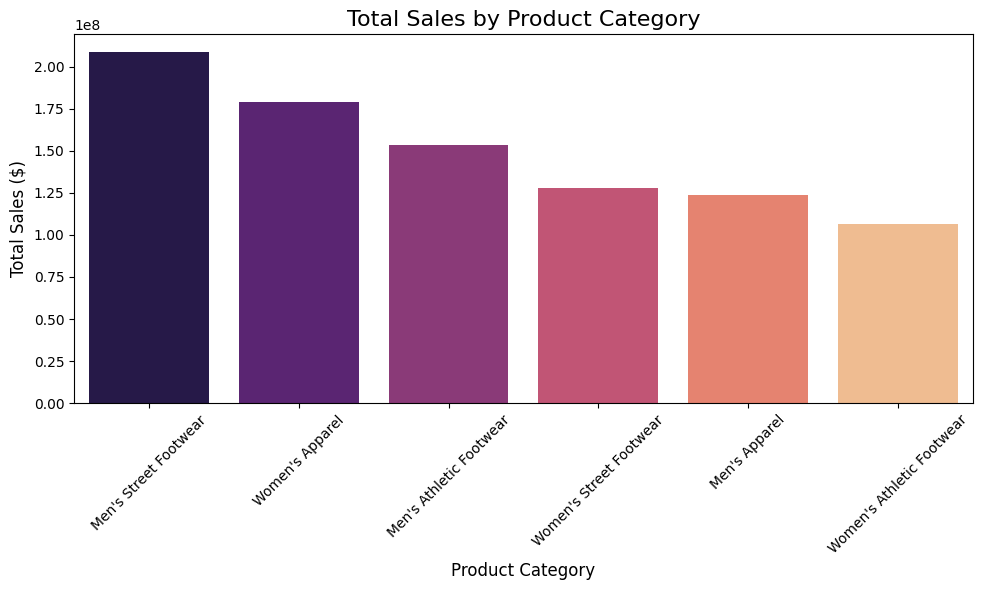

In [23]:
# Visualize sales trends by product category
plt.figure(figsize=(10, 6))
sns.barplot(x=product_sales.index, y=product_sales.values, palette="magma")
plt.title("Total Sales by Product Category", fontsize=16)
plt.ylabel("Total Sales ($)", fontsize=12)
plt.xlabel("Product Category", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




Total Sales by Sales Method:
Sales Method
In-store    356643750.0
Outlet      295585493.0
Online      247672882.0
Name: Total Sales, dtype: float64


<ipython-input-25-cae1228a3ac3>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=method_sales.index, y=method_sales.values, palette="cool")


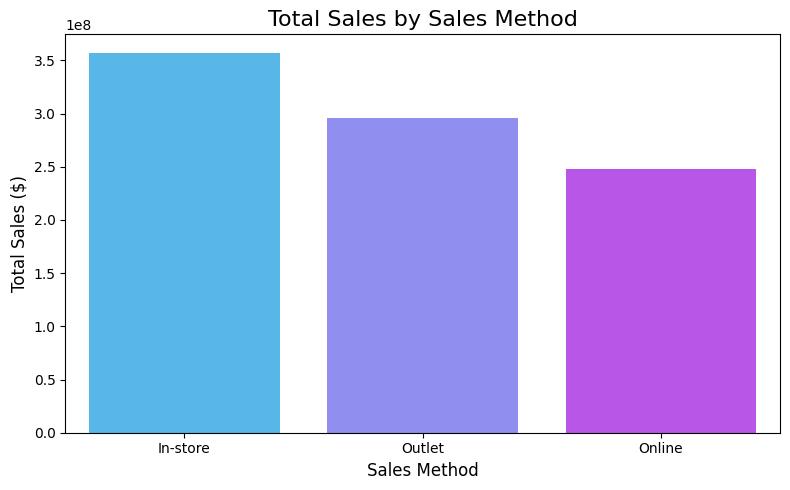

In [25]:
print("\nTotal Sales by Sales Method:")
print(method_sales)

# Visualize sales trends by sales method
plt.figure(figsize=(8, 5))
sns.barplot(x=method_sales.index, y=method_sales.values, palette="cool")
plt.title("Total Sales by Sales Method", fontsize=16)
plt.ylabel("Total Sales ($)", fontsize=12)
plt.xlabel("Sales Method", fontsize=12)
plt.tight_layout()
plt.show()


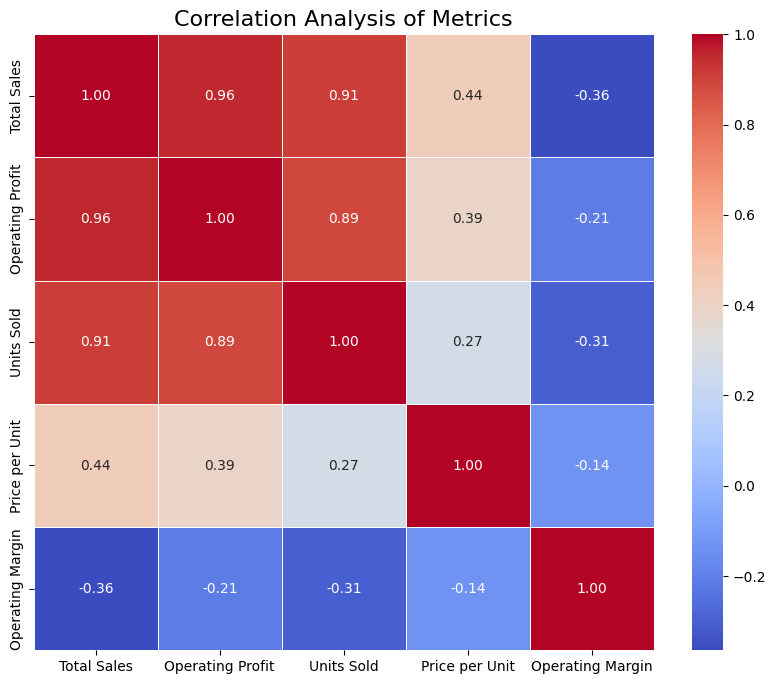

In [27]:
# Heatmap to visualize correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Analysis of Metrics", fontsize=16)
plt.show()